In [11]:
from langchain.agents import create_agent
from langchain.tools import tool

@tool
def read_email(email_id:str)->str:
    """Read the email by its email id"""
    return f"Email has been read of email : {email_id}"

@tool
def send_email(to:str, subject:str, content:str)->str:
    """Send email"""
    return f"Email has been send to {to}"

In [17]:
from langgraph.checkpoint.memory import InMemorySaver
from langchain.agents.middleware import HumanInTheLoopMiddleware
agent = create_agent(
    model="gpt-5-nano",
    tools=[send_email, read_email],
    checkpointer=InMemorySaver(),
    middleware=[HumanInTheLoopMiddleware(
        interrupt_on={
            "send_email": {
                "allowed_decisions" : ["approve", "edit", "reject"]
            },
            
            "your_read_email_tool": False,
        }
    )]

)

In [18]:
config = {"configurable": {"thread_id": "100"}}
agent.invoke({"messages": "Send an email to sam@gmail.com about rembering to take 100 ruppes before going to collge"}, config)

{'messages': [HumanMessage(content='Send an email to sam@gmail.com about rembering to take 100 ruppes before going to collge', additional_kwargs={}, response_metadata={}, id='62f61c66-ff79-482f-8be7-bb7cc643fe51'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 901, 'prompt_tokens': 174, 'total_tokens': 1075, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 832, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D429qmjPVT3TDgP9H1tOgV1qWGbtt', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c1384-86b1-7971-8ee9-130a2988d120-0', tool_calls=[{'name': 'send_email', 'args': {'to': 'sam@gmail.com', 'subject': 'Reminder: Take 100 rupees before going to college', 'conten

In [19]:
### Model call llimit middleware
from langchain.agents.middleware import ModelCallLimitMiddleware
agent = create_agent(
    model="gpt-5-nano",
    checkpointer=InMemorySaver(),
    middleware=[ModelCallLimitMiddleware(
        thread_limit=1,
        run_limit=2,
        exit_behavior="end"
    )]

)

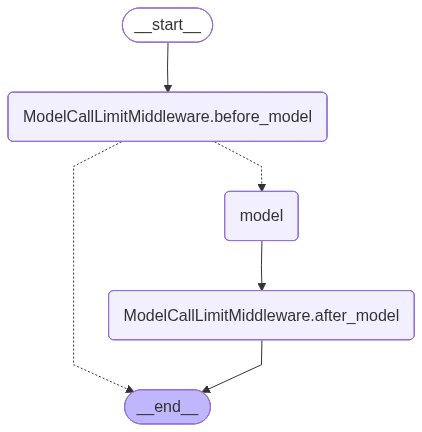

In [20]:
agent

In [21]:
## model fallback
from langchain.agents.middleware import ModelFallbackMiddleware

agent = create_agent(
    model="gpt-5-nano",
    middleware=[
        ModelFallbackMiddleware(
            first_model="gpt-5-mini"
        )
    ]
)

In [25]:
agent.invoke({"messages":"Who are you?"})

{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='ca30c190-ef0b-447f-aafb-f6bc69fe69ce'),
  AIMessage(content='Hi! I’m ChatGPT, an AI assistant created by OpenAI. I’m a large language model that generates text to help with questions, explanations, writing, coding, brainstorming, planning, and more. I don’t have thoughts or feelings or a personal identity—just patterns learned from lots of text.\n\nKey points:\n- Knowledge up to June 2024 (I don’t automatically browse in real time unless you enable a tool).\n- I can help with many tasks in multiple languages and adjust tone and depth.\n- I don’t have access to private data unless you share it with me in the chat.\n\nWhat would you like help with today? If you have a preferred style or format, tell me and I’ll tailor my responses.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 926, 'prompt_tokens': 10, 'total_tokens': 936, 'completion_tokens_